# This project is based on performing exploratory data analysis on "TITANIC DATASET" 

**the dataset is taken from Kaggle**

**In this I ll try to predict a classification- survival or deceased**

* IMPORTING ESSENTIAL LIBRARIES

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

* LOADING DATASET

In [51]:
df = pd.read_csv(r"titanic_train.csv")   
df.head()   # head method returns the initial 5 rows in our dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
df.shape  # shape function returns the total no of rows & columns in our dataset

(891, 12)

# STEP - EXPLORATORY DATA ANALYSIS

**Lets begin with checking the no of null values in data**

In [53]:
df.isnull().sum()   # this checks the presence of any null values in our data

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

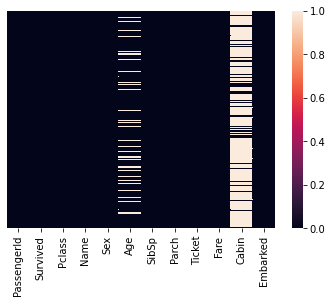

In [54]:
sns.heatmap(df.isnull(),yticklabels=False)  # this is the visulaization for better understanding the presence of null & non null values

Roughly 20 percent of the Age data is missing. 
The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. 
Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. 

**Now we will measure the count of no of people survived & not survived**

This below count plot depicts the survival rate on the basis of survival column in our dataset

The value 0 depicts person did'nt  survive

The value 1 depicts person survived.


<AxesSubplot:xlabel='Survived', ylabel='count'>

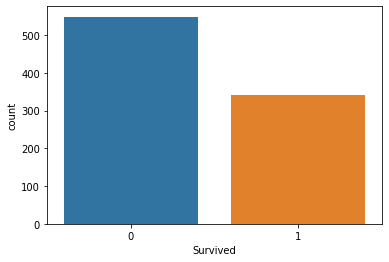

In [55]:
sns.countplot(x='Survived',data=df)

**Now we will check how many male & female survived or died by plotting countplot on the basis of Sex column in dataset**

<AxesSubplot:xlabel='Survived', ylabel='count'>

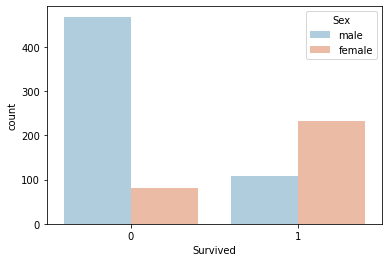

In [56]:
sns.countplot(x='Survived',hue='Sex',data=df,palette = 'RdBu_r')

* from the above plot we can clearly examine that the survival rate of females is more 
i.e. largely the male passenger died in this incident while more female survived

Now we will check is there any relation between Pclass & survial rate 

this would help us to know which class passenger where more likely to survive

<AxesSubplot:xlabel='Survived', ylabel='count'>

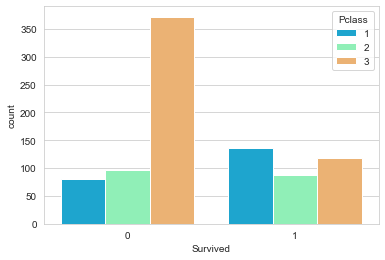

In [57]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df,palette = 'rainbow')

from the above plot we can analyse that the passenger with Pclass 3 has the least survial rate 

i.e. more passengers in pclass 3 died 

c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

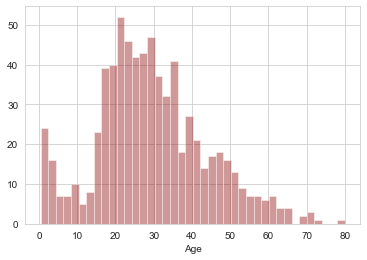

In [58]:
sns.distplot(df['Age'].dropna(),kde=False,color='darkred',bins=40)

<AxesSubplot:>

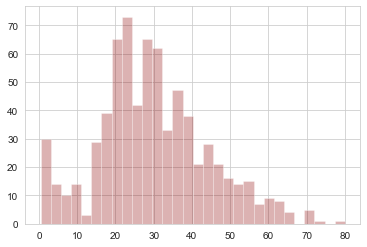

In [59]:
df['Age'].hist(bins=30,color='darkred',alpha=0.3)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

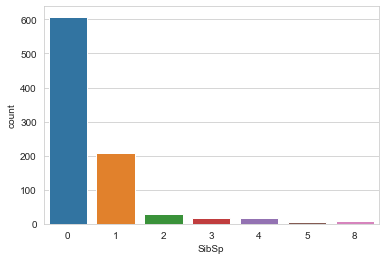

In [60]:
sns.countplot(x='SibSp',data=df)

<AxesSubplot:>

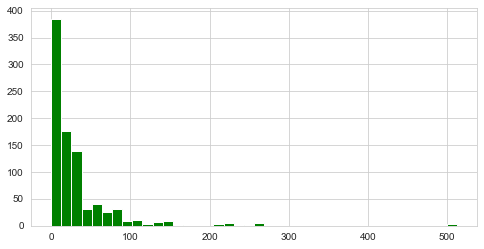

In [61]:
df['Fare'].hist(color='green',bins=40,figsize=(8,4))

# DATA CLEANING

We want to fill in missing age data instead of just dropping the missing age data rows.

One way to do this is by filling in the mean age of all the passengers (imputation). 

However we can be smarter about this and check the average age by passenger class. For example:

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

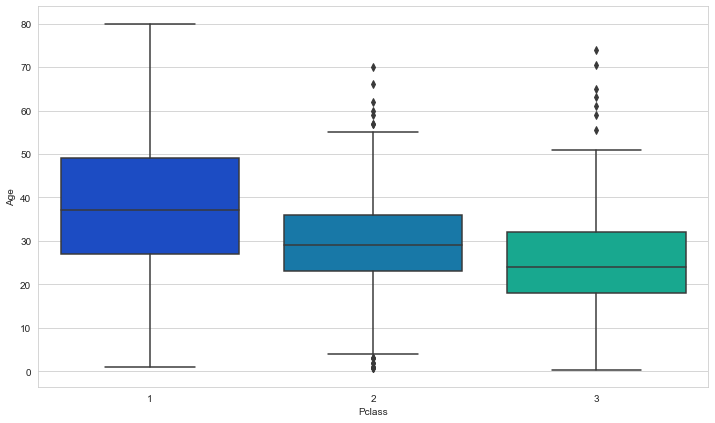

In [62]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

From the above plot we can see the wealthier passengers in the higher classes tend to be older, which makes sense.
We'll use these average age values to impute based on Pclass for Age.

* Now to remove null values from Age column we will create a function as specified below

In [63]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [64]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)  # apply the above function

<AxesSubplot:>

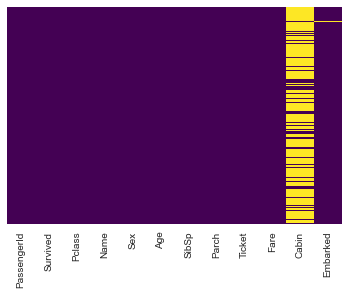

In [65]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

We can clearly examine that the null values which were earlier present in our "Age" column no more exist , 

hence we have successfully removed those null values

In [66]:
df.drop('Cabin',axis=1,inplace=True)

In [67]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [68]:
df.dropna(inplace=True)

# Converting Categorical Features

We'll need to convert categorical features to dummy variables using pandas! 

Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.



In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 69.5+ KB


In [70]:
pd.get_dummies(df['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [71]:
sex = pd.get_dummies(df['Sex'],drop_first=True)
embark = pd.get_dummies(df['Embarked'],drop_first=True)

In [72]:
df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)  # droping all the columns which are not required

In [73]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [74]:
df = pd.concat([df,sex,embark],axis=1)

In [75]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


Great! Our data is ready for our model!



# Building a Logistic Regression model
Let's start by splitting our data into a training set and test set



# Train Test Split

In [34]:
df.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [35]:
df['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived',axis=1), df['Survived'], test_size=0.30, 
                                                    random_state=101)


# Training and Predicting

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
predictions = logmodel.predict(X_test)

In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
accuracy=confusion_matrix(y_test,predictions)

In [43]:
accuracy

array([[148,  15],
       [ 39,  65]], dtype=int64)

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.797752808988764

In [46]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

# Evaluation
We can check precision,recall,f1-score using classification report!

In [47]:
from sklearn.metrics import classification_report

In [48]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       163
           1       0.81      0.62      0.71       104

    accuracy                           0.80       267
   macro avg       0.80      0.77      0.78       267
weighted avg       0.80      0.80      0.79       267

